# 5300 Final 1. Double Pendulum

Here we solve the double pendulum found in Taylor Section 11.4. We use the Euler-Lagrange equations.


## Euler-Lagrange equations

The Lagrangian is $\mathcal{L} = T - U$. Using Taylor (11.37) for $U$ and Taylor (11.38) for $T$, the Lagrangian for the double pendulum is given below.

$\begin{align}
\mathcal{L} = \frac12 (m_1 + m_2) L_1^2 \dot\phi_1^2 + m_2 L_1 L_2 \dot\phi_1 \dot\phi_2 \cos(\phi_1 - \phi_2) + \frac12 m_2 L_2^2 \dot\phi_2^2 - (m_1 + m_2) g L_1 (1 - \cos\phi_1) - m_2 g L_2 (1 - \cos\phi_2)
\end{align}$

The Euler-Lagrange equation is $\frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi} = \frac{\partial\mathcal L}{\partial\phi}$. Below are the equations of motion.

$\begin{align}
  \ddot\phi_1 = (m_2 g \sin\phi_2 \cos(\phi_1 - \phi_2) - m_2 \sin(\phi_1 - \phi_2) (L_1 \dot\phi_1^2 \cos(\phi_1 - \phi_2) + L_2 \dot\phi_2^2) - (m_1 + m_2) g \sin\phi_1) \div (L_1 (m_1 + m_2 {\sin}^2(\phi_1 - \phi_2)))
\end{align}$

$\begin{align}
  \ddot\phi_2 = ((m_1 + m_2) (L_1 \dot\phi_1^2 \sin(\phi_1 - \phi_2) - g \sin\phi_2 + g \sin\phi_1 \cos(\phi_1 - \phi_2)) \\
 + m_2 L_2 \dot\phi_2^2 \sin(\phi_1 - \phi_2) \cos(\phi_1 - \phi_2)) \div (L_2 (m_1 + m_2 {\sin}^2(\phi_1 - \phi_2)))
\end{align}$


In [1]:
%matplotlib inline

In [2]:
# Importing packages that are needed
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [3]:
# Changing common font size to 14
font_size = 14
plt.rcParams.update({'font.size': font_size})

## Pendulum class and utility functions

In [4]:
class LagrangianPendulum():
    """
    This Pendulum class implements the parameters and Lagrange's equations for 
    a simple double pendulum w/o driving or damping.
     
    Parameters
    ----------
    L1 : float
        length of first pendulum
    L2 : float
        length of second pendulum
    m1 : float
        mass of first pendulum
    m2 : float
        mass of second pendulum
    g : float
        gravitational acceleration at earth's surface
    """
    # Setting values using self
    def __init__(self, L1=1., L2=1., m1=1., m2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = m1
        self.m2 = m2
    
    def dy_dt(self, t, y):
        """
        This function returns right-hand side of the diffeq in vector
        y, given time t and y value: 
        [dphi1/dt d^2phi1/dt^2 dphi2/dt d^2phi2/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with y[0] = phi1(t), y[1] = dphi1/dt, \
            y[2] = phi2(t), and y[3] = dphi2/dt
            
        Returns
        -------
        """
        # Creating some variables to make writing out the expressions easier
        c = np.cos(y[0] - y[2])
        s = np.sin(y[0] - y[2])
        M = self.m1 + self.m2
        
        # This returns dphi1/dt, d^2phi1/dt^2, dphi2/dt, and d^2phi2/dt^2
        return [ y[1], \
                (self.m2*self.g*np.sin(y[2])*c - self.m2*s*(self.L1*y[1]**2*c \
                + self.L2*y[3]**2) - M*self.g*np.sin(y[0])) / self.L1 / \
                (self.m1 + self.m2*s**2), \
                y[3], \
                (M*(self.L1*y[1]**2*s - self.g*np.sin(y[2]) + self.g*np.sin(y[0])*c) + \
                self.m2*self.L2*y[3]**2*s*c) / self.L2 / (self.m1 + self.m2*s**2) ]
    
    
    def solve_ode(self, t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solves ODE given initial conditions
        We can specify smaller abserr and relerr to get more precision
        Initial conditions have _0 at the end of them
        """
        y = [phi1_0, phi1_dot_0, phi2_0, phi2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        
        phi1, phi1_dot, phi2, phi2_dot = solution.y

        return phi1, phi1_dot, phi2, phi2_dot

In [5]:
# Creating our start and stop points of the indices
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # start index 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  #  end index 
    return start_index, stop_index

## Make simple pendulum plots

In [6]:
# Picking a common plotting time
t_start = 0.
t_end = 50.
delta_t = 0.001

# This is our time array
t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

#Specifying values for the lengths, gravity, and masses
L1 = 1.
L2 = 1.
g = 1.
m1 = 1.
m2 = 1.

# Instantiating our pendulums 
p = LagrangianPendulum(L1=L1, L2=L2, g=g, m1=m1, m2=m2)

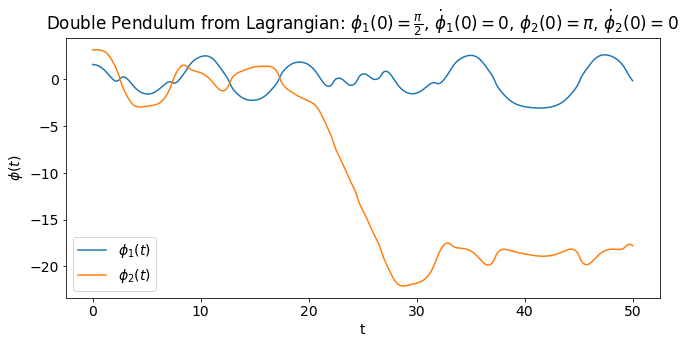

In [7]:
# Specifying initial conditions for our plots
phi1_0 = (1./2.)*np.pi
phi1_dot_0 = 0.
phi2_0 = np.pi
phi2_dot_0 = 0.

# Getting our values for our phis and phi_dots
phi1, phi1_dot, phi2, phi2_dot = \
p.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)

# Starting the plot
fig = plt.figure(figsize=(10,5))
    
# This is our phi vs. t plot 
ax = fig.add_subplot(1,1,1)                  

# Plotting phi1 and phi2 as functions of time
start, stop = start_stop_indices(t_pts, t_start, t_end)
ax.plot(t_pts[start : stop], phi1[start : stop], label=r'$\phi_1(t)$')
ax.plot(t_pts[start : stop], phi2[start : stop], label=r'$\phi_2(t)$')

# Giving the plot labels and a title
ax.set_xlabel('t')
ax.set_ylabel(r'$\phi(t)$')
ax.set_title('Double Pendulum from Lagrangian: ' r'$\phi_1(0) = \frac{\pi}{2}$' \
             ', ' r'$\dot\phi_1(0) = 0$' ', ' r'$\phi_2(0) = \pi$' ', ' \
             r'$\dot\phi_2(0) = 0$')

# Giving the plot a legend
ax.legend()

# We only want the plot
fig.tight_layout()

# This is how we would save our plot as a jpg
#fig.savefig('Double Pendulum Lagrange.jpg', bbox_inches='tight')

We can see from the graph that the $\phi$s get further away from each other with time. They start with a separation of $\frac{pi}{2}$ that grows larger with time.

## Showing chaos

To show that the system is chaotic for initial conditions beyond the small angle approximation, we will plot $\log|\Delta\phi(t)|$ vs. time.

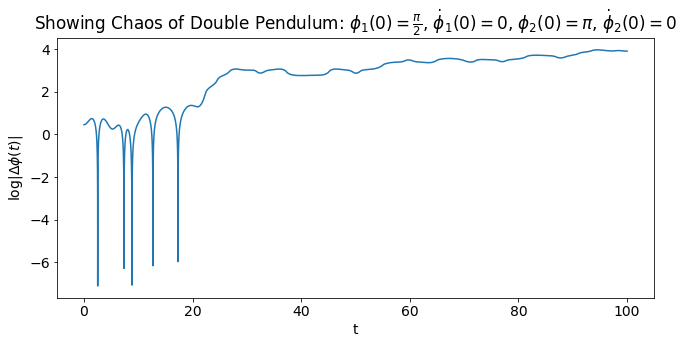

In [8]:
# Specifying new time array to see what is happening long term
t_pts2 = np.arange(t_start, 100+delta_t, delta_t)
chaos = p.solve_ode(t_pts2, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)

# Starting a new plot
fig2 = plt.figure(figsize=(10,5))

ax2 = fig2.add_subplot(1,1,1)                  

# Plotting log|phi2(t) - phi1(t)| vs. time
ax2.plot(t_pts2, np.log(np.abs(chaos[2] - chaos[0])), label=r'$\phi_1(t)$')

# Giving our plot labels and a title
ax2.set_xlabel('t')
ax2.set_ylabel(r'$\log|\Delta\phi(t)|$')
ax2.set_title('Showing Chaos of Double Pendulum: ' r'$\phi_1(0) = \frac{\pi}{2}$' \
             ', ' r'$\dot\phi_1(0) = 0$' ', ' r'$\phi_2(0) = \pi$' ', ' \
             r'$\dot\phi_2(0) = 0$')

fig2.tight_layout()

# This is how we would save our plot as a jpg
#fig2.savefig('Double Pendulum Lagrange Chaos.jpg', bbox_inches='tight')

We can see that the separation between $\phi_1(t)$ and $\phi_2(t)$ grows with time. $\log|\Delta\phi(t)|$ increases over time linearly (at least from t = 0 to t = 30) which proves the system is chaotic at that time interval.